In [675]:
import pandas as pd
import numpy as np

In [676]:
x = 2.6 + 7 * np.random.randn(20000)

In [677]:
res = 0 + 0.9 * np.random.randn(20000)

In [678]:
y_pred = 5 + 0.3 * x

In [679]:
y_act = 5 + 0.3 * x + res

In [680]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [681]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [682]:
data.head()

,x,y_actual,y_prediccion
0,7.336622,7.867227,7.200986
1,2.680493,5.455754,5.804148
2,-2.743710,5.369774,4.176887
3,7.967393,7.894700,7.390218
4,11.851485,8.176712,8.555446


In [683]:
data.corr()

,x,y_actual,y_prediccion
x,1.000000,0.919765,1.000000
y_actual,0.919765,1.000000,0.919765
y_prediccion,1.000000,0.919765,1.000000


In [684]:
import matplotlib.pyplot as plt

In [685]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

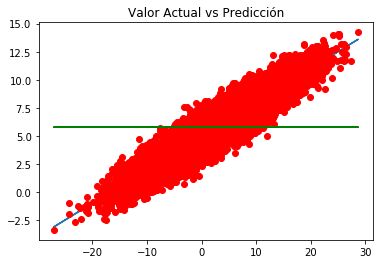

In [691]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

In [692]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [693]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,7.336622,7.867227,7.200986,2.042841,0.443877,4.391207
1,2.680493,5.455754,5.804148,0.001052,0.121379,0.099826
2,-2.743710,5.369774,4.176887,2.543449,1.422980,0.161550
3,7.967393,7.894700,7.390218,2.619579,0.254502,4.507101
4,11.851485,8.176712,8.555446,7.749204,0.143439,5.784051


In [694]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [695]:
SSR

89673.94572791812

In [696]:
SSD

16196.731047858026

In [697]:
SST

105141.88671259976

In [698]:
R2=(SSR/SST)*100

In [699]:
R2

85.28850730350455

In [700]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(2.578213672018124, 5.771706505084125)

In [701]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [702]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [703]:
alpha = y_mean - beta * x_mean

In [704]:
alpha, beta

(5.001384886847047, 0.2987811392816406)

In [705]:
data["y_model"] = alpha + beta * data["x"]

In [706]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,7.336622,7.867227,7.200986,2.042841,0.443877,4.391207,9.971342,22.642446,7.193429
1,2.680493,5.455754,5.804148,0.001052,0.121379,0.099826,-0.032315,0.010461,5.802266
2,-2.743710,5.369774,4.176887,2.543449,1.422980,0.161550,2.139053,28.322872,4.181616
3,7.967393,7.894700,7.390218,2.619579,0.254502,4.507101,11.441192,29.043252,7.381892
4,11.851485,8.176712,8.555446,7.749204,0.143439,5.784051,22.302268,85.993569,8.542385


In [707]:
data.corr()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
x,1.000000,0.919765,1.000000,-0.002775,-0.001574,-0.004024,-0.004022,-0.003938,1.000000
y_actual,0.919765,1.000000,0.919765,-0.002795,-0.002322,-0.004332,-0.004189,-0.003866,0.919765
y_prediccion,1.000000,0.919765,1.000000,-0.002775,-0.001574,-0.004024,-0.004022,-0.003938,1.000000
SSR,-0.002775,-0.002795,-0.002775,1.000000,0.001489,0.847511,0.958044,0.999999,-0.002775
SSD,-0.001574,-0.002322,-0.001574,0.001489,1.000000,0.153605,0.000871,0.001490,-0.001574
SST,-0.004024,-0.004332,-0.004024,0.847511,0.153605,1.000000,0.957599,0.847513,-0.004024
beta_n,-0.004022,-0.004189,-0.004022,0.958044,0.000871,0.957599,1.000000,0.958045,-0.004022
beta_d,-0.003938,-0.003866,-0.003938,0.999999,0.001490,0.847513,0.958045,1.000000,-0.003938
y_model,1.000000,0.919765,1.000000,-0.002775,-0.001574,-0.004024,-0.004022,-0.003938,1.000000


In [662]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [663]:
SSR,SSD,SST

(87835.10137540913, 16424.87503735127, 104259.97641276261)

In [664]:
R2=(SSR/SST)*100
R2

84.24623177322827

Text(0.5, 1.0, 'Valor Actual vs Predicción')

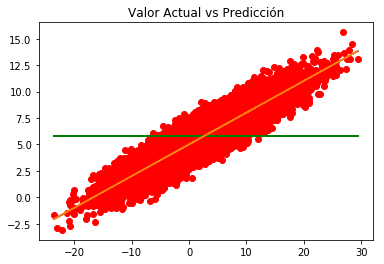

In [665]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")